# Matplotlib

In [2]:
%pip install matplotlib numpy

import matplotlib.pyplot as plt 
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np

- The simplest way of creating a figure with an Axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the Axes, and show to display the figure

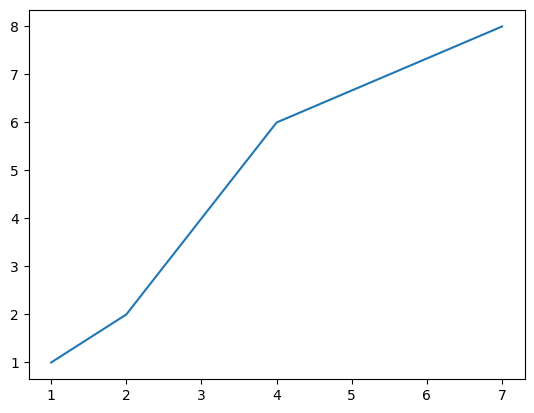

In [4]:
fig, ax = plt.subplots()
ax.plot([1, 2, 4, 7], [1, 2, 6, 8])
plt.show()

## Components of a Matplotlib 
![Components_of_Matplotlib](Matplotlib.png)

## Figure
The Figure keeps tracks of all child `Axes`

<Figure size 640x480 with 0 Axes>

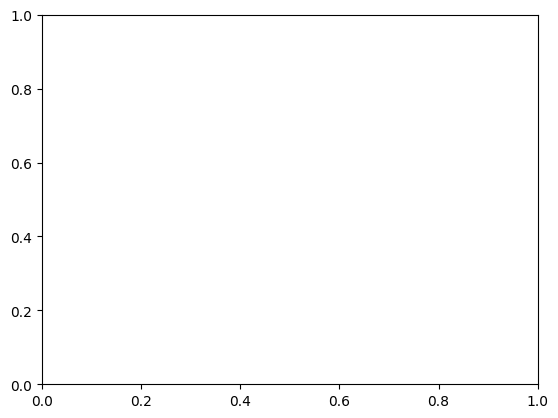

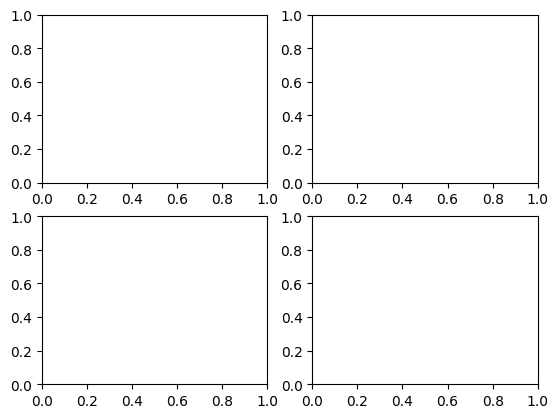

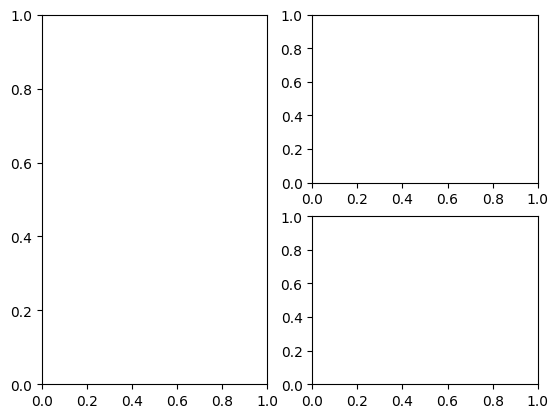

In [5]:
fig = plt.figure() # an empty figure with no Axes
fig, ax = plt.subplots() # a figure with a single Axes
fig, axs = plt.subplots(2, 2) # a figure with a 2 * 2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig,axs = plt.subplot_mosaic([['left', 'right_top'], ['left', 'right_bottom']])

`subplot()` and `subplot_mosaic` are convenience function that additionally create Axes objects inside the figure

## Axes
- An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two(or three in the case of 3D) 
- `Axis`objects that provide ticks and tick labels to provide scales for the data in the Axes. Each `Axes` also has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label (set via `set_ylabel()`).
- The `Axes` methods are the primary interface for configuring most parts of your plot

## Axis
These objects set the scale and limits and generate ticks (the marks on the Acis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a `Locator` object and the ticklabel strings are formatted by a `formatter`. The combination of correct `Locator` and `Formatter` gives very fine control over the tick locations and labels.

## Artist
Basically, everything visible on the Figure is an Artist. This includes `Text` objects, `Line2D` objects, `collections` objects etc. 
- When the figure is rendered all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another. 

## Types of imputs to plotting functions

- plotting functions except `numpy.array` or `numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`. Classes that are similar to arrays ('array-like') such as `pandas` data objects and `numpy.matrix` may not work as intended. common convention is to convert these to `numpy.array` objects prior to plotting. *for example*, to convert a `numpy.matrix`

In [6]:
b = np.matrix([[1,2], [3, 4]])
b_asarray = np.asarray(b)

Most methods will also parse a string -indexable object like a dict, a `structured_numpy_array`, or a `pandas.DataFrame`. Matplotlib allows you to provide the `data` keyword argument and generate plots passing the strings corresponding to the x and y variables. 

Text(0, 0.5, 'entry b')

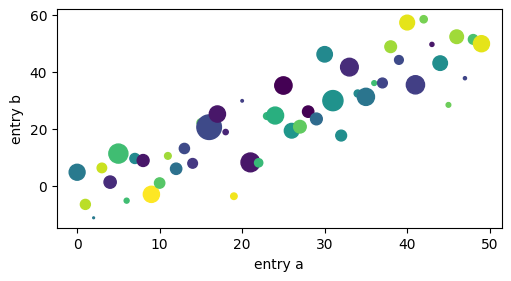

In [9]:
np.random.seed(19680801)
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel("entry a")
ax.set_ylabel("entry b")    

Text(0, 0.5, 'entry b')

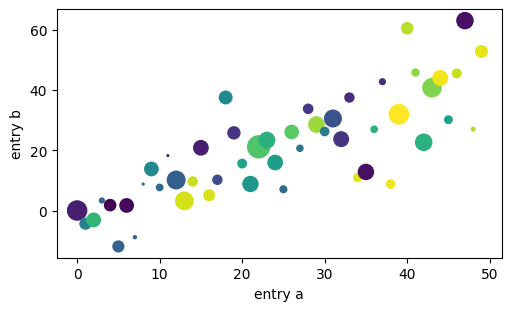

In [12]:
np.random.seed(196808)
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 3), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel("entry a")
ax.set_ylabel("entry b") 

## Coding styles
### The explicit and the implicit interfaces
- 2 ways of using Matplotlib:
    - **Explicitly** create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
    - Rely on pyplot to **implicitly** create and manage the Figures and Axes, and use pyplot functions for plotting. 


#### Explicit OO-style

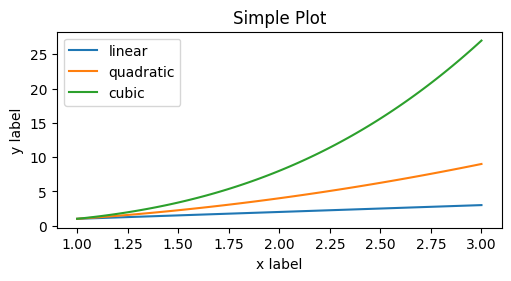

In [15]:
x = np.linspace(1, 3, 98) # Sample data. 
# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure. 
fig, ax = plt.subplots(figsize = (5, 2.7), layout='constrained')
ax.plot(x, x, label='linear') # Plot some data on the Axes. 
ax.plot(x, x**2, label='quadratic') # Plot more data on the Axes..
ax.plot(x, x**3, label='cubic') # .. and some more. 
ax.set_xlabel('x label') # Add an x-label to the Axes. 
ax.set_ylabel('y label') # Add a y-label to the Axes.
ax.set_title("Simple Plot") # Add a title to the Axes.
ax.legend() # Add a legend.

#### Implicitly pyplot-style

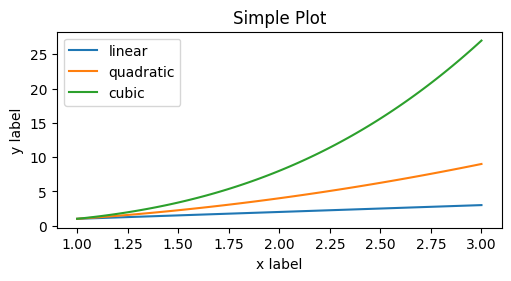

In [17]:
x = np.linspace(1, 3, 98) # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear') # Plot some data on the (implicit) Axes.
plt.plot(x, x**2, label='quadratic') # Plot more data on the (implicit) Axes.
plt.plot(x, x**3, label='cubic') # .. and some more.
plt.xlabel('x label') # Add an x-label to the (implicit) Axes.
plt.ylabel('y label') # Add a y-label to the (implicit) Axes.
plt.title("Simple Plot") # Add a title to the (implicit) Axes.
plt.legend() # Add a legend.

### Making a helper functions
use this helper function if you need to make the same plots over and over again with different data sets

In [19]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

- Which you would then use twice to populate two subplots:

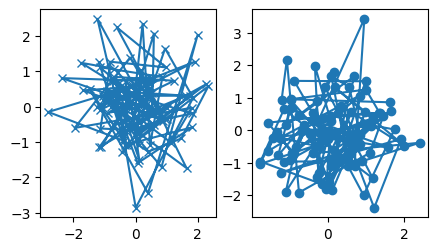

In [21]:
data1, data2, data3, data4 = np.random.randn(4, 100) # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Styling Artists
Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter on the Artist. 
- In the plot below we manually set the color, linewidth, and linestyle of the Artists created by `plot`, and we set linestyle of the second line after the fact with `set_linestyle`.

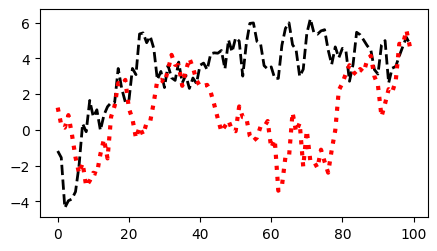

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='black', linewidth=2, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='red', linewidth=3)
l.set_linestyle(':')

### Colors
- Matplotlib has a very flexible array of colors that are accepted for most Artists; 
- SOme Artists will take multiple colors
- for `scatter` plot, the edge of the markers can be different colors from interior:

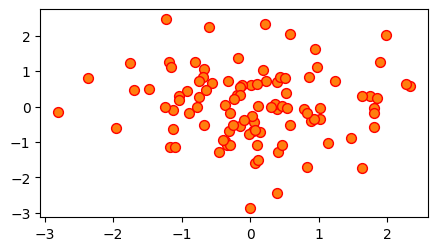

In [32]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C1', edgecolor='r')

### Linewidths, linestyles, and markersizes
- Line widths are typically in typographic points **(1 pt = 1/72 inch)** and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle.
- Marker size depends on the method being used. `plot` specifies markersize in points, and is generally the `diameter` or width of the marker. `scatter` specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see `markers`), or users can define their own `MarkerStyle`

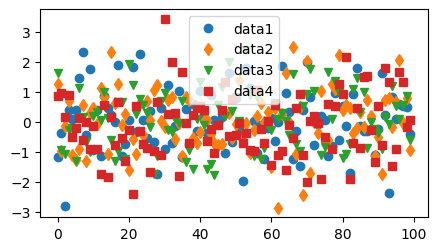

In [33]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

### Labelling plots
#### Axes labels and test
`set_xlabel`,`set_ylabel`, and `set_title` are used to add text in the indicated locations. Text can also be directly addded to plots using `text`:

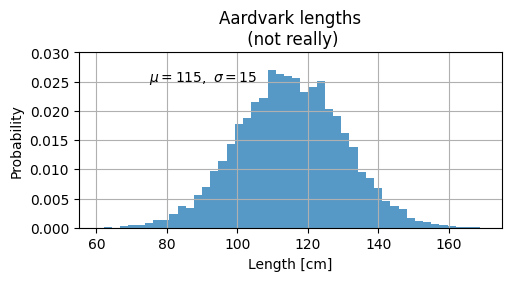

In [40]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data 
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115, \ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

- All the `text` functions return a`matplotlib.text.Text`instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:


In [41]:
t = ax.set_xlabel('my data', fontsize=14, color ='red')

#### Using mathematical expressions in text 
- Matplotlib accepts TeX equation expressions in any text expression. *For example* to write the expression sigma_i = 15 in the title, you can wrute a TeX expressin surrounded by dollar signs:
- where `r` preceding the title string signifies that the string is a raw string and not to treat backslashes as python escapes.
- Matplotlib has a built-in TeX expression parser and layout engine, and ships its own math fonts 
- One can also use Latex directly to format your text and incorporate the output directly into your display figures or saved postscript 


In [42]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

#### Annotations
We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at *xytext*:

(-3.0, 3.0)

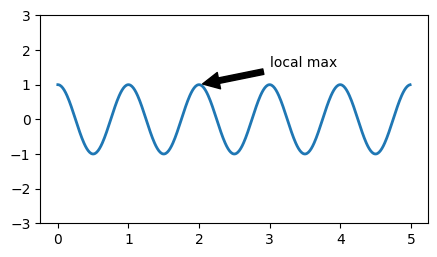

In [44]:
fig, ax = plt.subplots(figsize=(5, 2.7))
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), 
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_ylim(-3, 3)
